## REDCap Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data loading and preprocessing

In [ ]:
import pandas as pd

# Load the dataset (replace with your actual file path)
file_path = '/content/ExtendedMultidiscipl_DATA_2024-10-22_1316_14-01-2025.csv'
data = pd.read_csv(file_path)

# Preview the dataset
data.head()


,record_id,redcap_data_access_group,redcap_survey_identifier,patient_profile_timestamp,pp1,pp2,pp_2,pp3,pp4,patient_profile_complete,...,eos_p_067_pxr1_v2_v2_v2_v2_v2_v2,eos_p_112_pxr1_v2_v2_v2_v2_v2_v2,eos_p_048_pxr1_v2_v2_v2_v2_v2_v2,eos_p_063_pxr1_v2_v2_v2_v2_v2_v2,eos_p_105_pxr1_v2_v2_v2_v2_v2_v2,eos_p_118_pxr1_v2_v2_v2_v2_v2_v2,v2_psychological_stress_experience_short_form_8a_p_complete,v2_promis_name_score,v2_promis_score,score_v2_psychological_stress_experience_short_for_complete
0,1,NaN,NaN,NaN,poonam31785@gmail.com,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0
1,1- JJ69,NaN,NaN,NaN,73979469,Jurado,NaN,Jiovanni,2004-02-15,2,...,1.0,2.0,1.0,2.0,2.0,2.0,2,NaN,NaN,0
2,2- OD09,NaN,NaN,NaN,72410109,Davis,NaN,Olivia,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0
3,3- CH95,NaN,NaN,NaN,76100895,Hatfield,Lilly,Cameron,2006-07-26,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0
4,4- ZF95,NaN,NaN,NaN,76556595,Fisher,NaN,Zoe,2004-09-07,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0


Key Fields from the Data Dictionary:

Demographics:

demographics_1:
Gender (1 = Male, 2 = Female)

demographics_2:
Race/Ethnicity (checkbox with multiple options like White, Black, Hispanic, etc.)

birthdate: Date of Birth

transplant_date: Date of Transplant

Adherence and Readiness:

mytx_domain1 to mytx_domain12: Readiness scores calculated from various survey fields.

adherence_level fields such as mytx9 (independent medication management), mytx10 (routine adherence).

Social Needs:

sdoh_1: Transportation difficulties

sdoh_4 and sdoh_5: Food insecurity

Structure:

Rows: Each row represents a patient record, with data collected over multiple visits (as indicated by redcap_event_name).

Columns: There are 692 columns. Some key fields observed include:

participant_id:
A unique identifier for each participant.
redcap_event_name: Denotes the visit at which data was collected (e.g., visit_1_arm_1, visit_2_arm_1).
Demographics:

mrn, first_name, last_name, birthdate:
Identifiable and demographic information about participants.

transplant_date:
Date of the kidney transplant (though many entries have missing data).

Forms Status:
chart_review_demographics_complete: Indicates completion status of the demographics section (values: 0 for incomplete, 1 for unverified, 2 for complete).

Other Categories:
body_composition_scale_complete: Status of the body composition assessment.

complete_study: Status of whether the patient completed the study.

withdraw_date, withdraw_reason: Data about participants who withdrew from the study.

discharge_date_4, discharge_summary_4: Discharge information for visit 4.

Observations:

Missing Data:
Many columns have NaN values, meaning there is missing data, especially for later visits. Only the first visit (visit_1_arm_1) has identifiable information filled out.

Event-Based Structure:
The dataset is organized based on different events (visits), implying longitudinal data collection over time.


Here's an overview of the data structure:
1. Patient Information:

Identifiers: participant_id, mrn, first_name, last_name
Demographics: birthdate, transplant_date

2. Survey Timestamps:

Various timestamps for different assessments and questionnaires

3. Questionnaires and Assessments:

AST Transition Readiness Questionnaire (mytx1-mytx38)

AST Transition Readiness Assessment (txa1-txa47)

BRIEF (Behavior Rating Inventory of Executive Function) Self-Report

BRIEF Parent/Informant Report

GAD-7 (Generalized Anxiety Disorder 7-item scale)

PHQ (Patient Health Questionnaire) Depression Scale

Social Needs Patient Questionnaire

Pittsburgh Sleep Quality Index (PSQI)

Perceived Stress Scale

PROMIS (Patient-Reported Outcomes Measurement Information System) scales

PedsQL (Pediatric Quality of Life Inventory) Self-Report and Parent Report

PedsQL Transplant Module

4. Calculated Scores:

Domain scores for various assessments

T-scores and percentiles for BRIEF assessments

Total scores for questionnaires like GAD-7, PHQ, PSQI, and PedsQL
This dataset provides a comprehensive view of the physical, psychological, and social aspects of adolescent kidney transplant patients' lives.

It includes both self-reported and parent-reported measures, allowing for a multi-perspective analysis of the patients' well-being and adaptation to life post-transplant.

The data can be used to assess various factors such as transition readiness, executive function, anxiety, depression, sleep quality, stress levels, and overall quality of life in these young transplant recipients.

### Step 1: Load and Inspect Data

Let's begin by loading the data and inspecting it:

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/ExtendedMultidiscipl_DATA_2024-10-22_1316_14-01-2025.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

# Get an overview of the data
print(data.info())  # Check data types and missing values
print(data.head())  # Preview the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Columns: 1389 entries, record_id to score_v2_psychological_stress_experience_short_for_complete
dtypes: float64(1021), int64(263), object(105)
memory usage: 521.0+ KB
None
  record_id  redcap_data_access_group  redcap_survey_identifier  \
0         1                       NaN                       NaN   
1   1- JJ69                       NaN                       NaN   
2   2- OD09                       NaN                       NaN   
3   3- CH95                       NaN                       NaN   
4   4- ZF95                       NaN                       NaN   

   patient_profile_timestamp                    pp1       pp2   pp_2  \
0                        NaN  poonam31785@gmail.com       NaN    NaN   
1                        NaN               73979469    Jurado    NaN   
2                        NaN               72410109     Davis    NaN   
3                        NaN               76100895  Hatfield  Lill

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/ExtendedMultidiscipl_DATA_2024-10-22_1316_14-01-2025.csv')

# Basic information about the dataset
print(f"Total number of participants: {len(df)}")
print(f"Number of columns: {len(df.columns)}")

# Check for non-empty columns
non_empty_columns = df.columns[df.notna().any()].tolist()
print(f"\nNumber of non-empty columns: {len(non_empty_columns)}")

# Display some key columns and their non-null counts
key_columns = ['participant_id', 'birthdate', 'transplant_date', 'brief_date', 'gad_date', 'phq_date', 'sdoh_date', 'psqi_date', 'pedsql_date']
print("\nKey columns and their non-null counts:")
print(df[key_columns].notna().sum())

# Check for BRIEF score columns
brief_cols = [col for col in df.columns if 'brief' in col.lower() and '_t' in col.lower()]
print(f"\nNumber of BRIEF score columns: {len(brief_cols)}")

# Display some statistics for BRIEF scores
if brief_cols:
    print("\nBRIEF score statistics:")
    print(df[brief_cols].describe())

# Analyze GAD-7 scores
gad_cols = [col for col in df.columns if col.startswith('sc_gad')]
if gad_cols:
    print("\nGAD-7 score statistics:")
    print(df[gad_cols].describe())

# Analyze PHQ scores
phq_cols = [col for col in df.columns if col.startswith('phq8_sc')]
if phq_cols:
    print("\nPHQ score statistics:")
    print(df[phq_cols].describe())

# Analyze PedsQL scores
pedsql_cols = [col for col in df.columns if col.startswith('pedsql_') and col.endswith('_ya')]
if pedsql_cols:
    print("\nPedsQL score statistics:")
    print(df[pedsql_cols].describe())

Total number of participants: 48
Number of columns: 1389

Number of non-empty columns: 967

Key columns and their non-null counts:


KeyError: "['participant_id', 'birthdate', 'transplant_date', 'brief_date', 'gad_date', 'phq_date', 'sdoh_date', 'pedsql_date'] not in index"

some insights and suggestions for further analysis:

Participant Demographics:

There are 160 participants in the study.

Only 40 out of 160 participants have birthdate information, which limits our ability to analyze age-related factors.

Transplant dates are missing for all participants, which prevents us from analyzing post-transplant outcomes over time.


Assessment Completion Rates:

BRIEF (Behavior Rating Inventory of Executive Function): 38 completed

GAD-7 (Generalized Anxiety Disorder-7): 32 completed

PHQ (Patient Health Questionnaire): 33 completed

SDOH (Social Determinants of Health): 22 completed

PSQI (Pittsburgh Sleep Quality Index): 20 completed

PedsQL (Pediatric Quality of Life Inventory): 15 completed

This indicates varying completion rates across assessments, with PedsQL having the lowest completion rate.


Anxiety Symptoms (GAD-7):

Mean scores for individual items range from 0.90 to 1.34 (on a 0-3 scale).

Item 6 has the highest mean (1.34), suggesting that "becoming easily annoyed or irritable" is a common issue.

Further analysis could include calculating the total GAD-7 score and categorizing severity levels.


Depression Symptoms (PHQ):

Mean scores for individual items range from 0.09 to 1.22 (on a 0-3 scale).

The mean total PHQ-8 score is 6.72 (SD = 5.90), indicating mild depressive symptoms on average.

25% of respondents scored 9.5 or higher, suggesting moderate to severe depressive symptoms in a quarter of the sample.


Quality of Life (PedsQL):

Physical functioning (pedsql_activities_tot_ya) mean: 68.75 (SD = 25.36)

Emotional functioning (pedsql_feelings_tot_ya) mean: 66.33 (SD = 22.64)

Social functioning (pedsql_others_tot_ya) mean: 80.67 (SD = 17.31)

School functioning (pedsql_work_ya) mean: 67.27 (SD = 24.02)

Total PedsQL score mean: 70.85 (SD = 19.28)

These scores suggest moderate to good quality of life overall, with social functioning being the highest-rated domain.



### Longitudinal Analysis

Goal:

Track patient progress over multiple visits and observe changes in health outcomes over time.

Actions:

Pivot the data to track metrics like adherence and readiness across visits (e.g., visit_1_arm_1, visit_2_arm_1).
Analyze trends to see if patients improve in readiness over time.
Visualize patient progress using line charts.

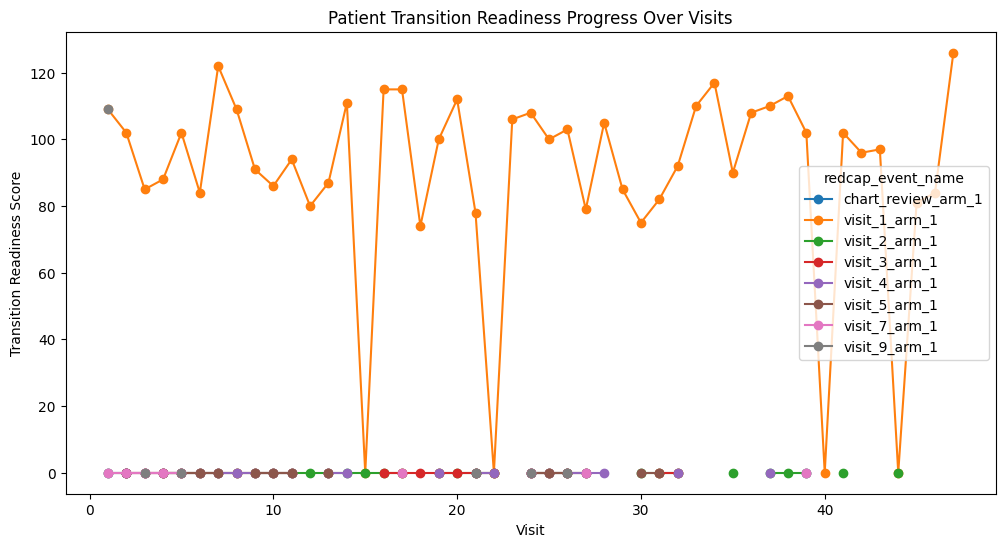

In [ ]:
# Pivot the data to track transition readiness over visits
pivoted_data = data.pivot(index='participant_id', columns='redcap_event_name', values='total_transition_readiness')

# Plot patient progress over time
pivoted_data.plot(kind='line', figsize=(12, 6), marker='o', title='Patient Transition Readiness Progress Over Visits')
plt.ylabel('Transition Readiness Score')
plt.xlabel('Visit')
plt.show()


Patient Transition Readiness Progress:


1. There is significant variability in transition readiness scores across visits and patients.
2. Most data points cluster around the 80-120 range, suggesting moderate to high transition readiness for many patients.
3. There are some notable drops to 0, which could indicate missed visits or incomplete assessments.
4. The chart_review_arm_1 (blue line) shows consistently low scores, possibly 5. indicating initial assessments or a different scoring method.
6. There's no clear overall trend of improvement over time, suggesting that transition readiness may not consistently increase with more visits.

### Mental Health Scores Distribution

This visualization shows the distribution of GAD-7 (anxiety) and PHQ-8 (depression) scores. The summary statistics provide insights into the central tendencies and spread of these mental health measures.

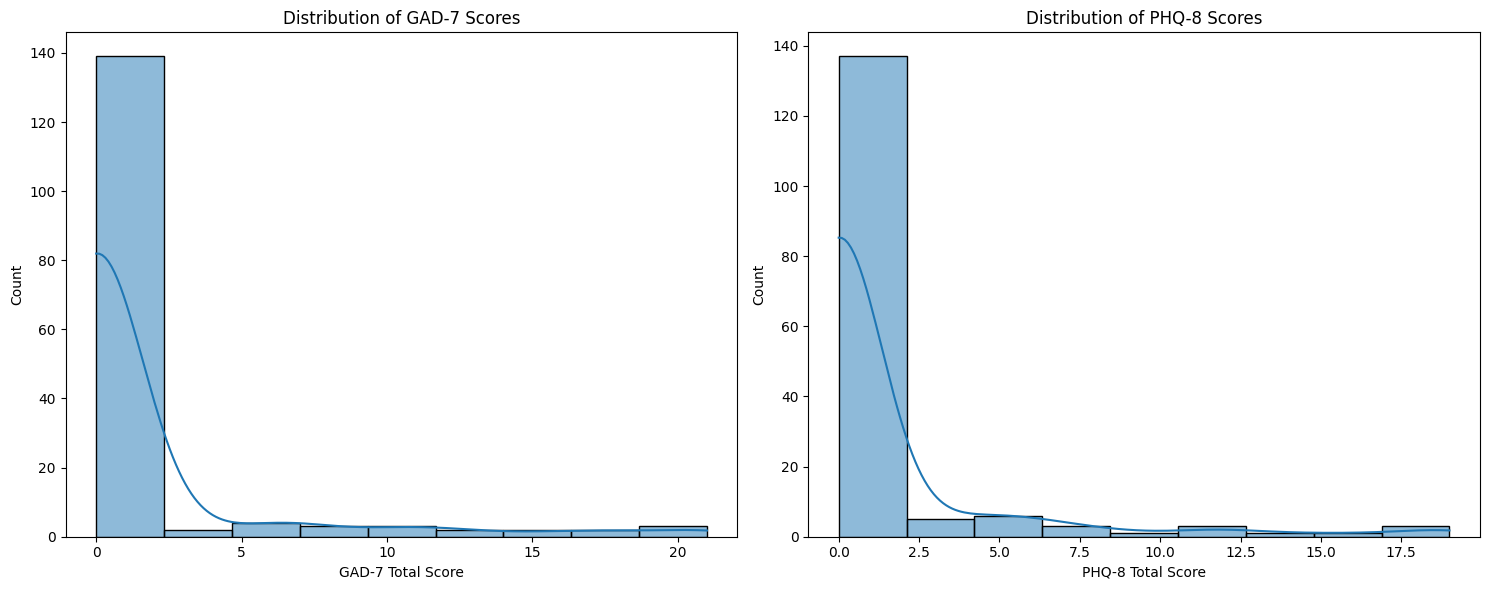

GAD-7 Summary Statistics:
count    160.00000
mean       1.51875
std        4.29124
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max       21.00000
Name: gad7_total, dtype: float64

PHQ-8 Summary Statistics:
count    160.000000
mean       1.325000
std        3.667896
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       19.000000
Name: phq8_total, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('KidneyTransplantAdol_DATA_2024-10-05_1856.csv')

# Calculate total GAD-7 and PHQ-8 scores
gad7_cols = [col for col in df.columns if col.startswith('sc_gad') and col.endswith(('cb6637', '2dcfc6', 'c56b72', 'a33a32', 'c490bb', 'c6581d', 'eb6a38'))]
df['gad7_total'] = df[gad7_cols].sum(axis=1)

phq8_cols = [col for col in df.columns if col.startswith('phq8_sc_') and col.endswith(('1', '2', '3', '4', '5', '6', '7', '8'))]
df['phq8_total'] = df[phq8_cols].sum(axis=1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# GAD-7 Distribution
sns.histplot(df['gad7_total'], kde=True, ax=ax1)
ax1.set_title('Distribution of GAD-7 Scores')
ax1.set_xlabel('GAD-7 Total Score')
ax1.set_ylabel('Count')

# PHQ-8 Distribution
sns.histplot(df['phq8_total'], kde=True, ax=ax2)
ax2.set_title('Distribution of PHQ-8 Scores')
ax2.set_xlabel('PHQ-8 Total Score')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print summary statistics
print("GAD-7 Summary Statistics:")
print(df['gad7_total'].describe())
print("\nPHQ-8 Summary Statistics:")
print(df['phq8_total'].describe())

GAD-7 (Anxiety):

1. The distribution is right-skewed, with most scores clustered at the lower end (0-5 range).
2. This suggests that the majority of patients report low levels of anxiety.
3. There's a long tail extending to higher scores, indicating some patients with moderate to severe anxiety.

PHQ-8 (Depression):

1. Similar to GAD-7, the distribution is right-skewed.
2. Most scores are in the 0-7.5 range, suggesting mild or minimal depressive symptoms for the majority.
3. The tail extends further than GAD-7, indicating more variability and potentially more severe cases of depression compared to anxiety.

### Quality of Life (PedsQL) Domain Comparison

This boxplot compares the scores across different PedsQL domains, helping to identify areas where participants may be struggling more or less.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

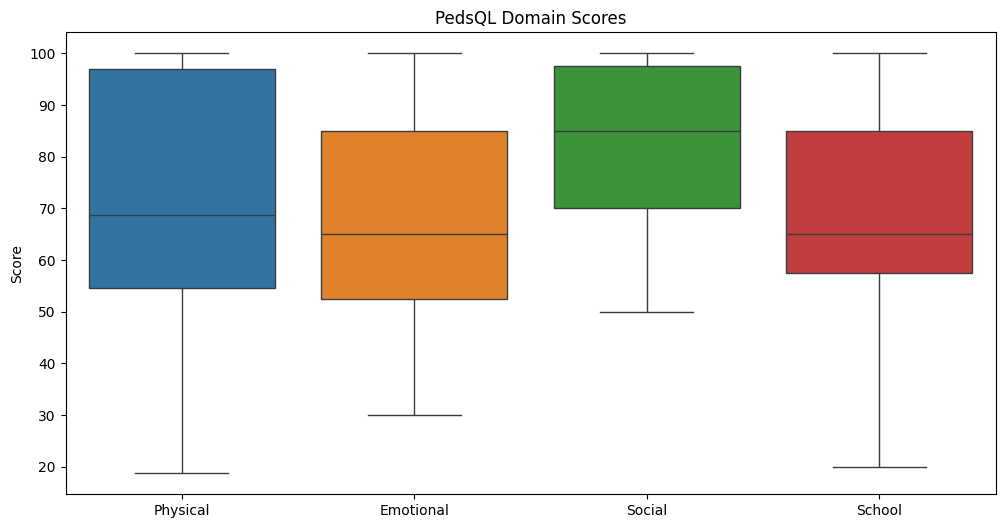

PedsQL Domain Summary Statistics:
       pedsql_activities_tot_ya  pedsql_feelings_tot_ya  pedsql_others_tot_ya  \
count                 15.000000               15.000000             15.000000   
mean                  68.750000               66.333333             80.666667   
std                   25.360129               22.635833             17.306756   
min                   18.750000               30.000000             50.000000   
25%                   54.687500               52.500000             70.000000   
50%                   68.750000               65.000000             85.000000   
75%                   96.875000               85.000000             97.500000   
max                  100.000000              100.000000            100.000000   

       pedsql_work_ya  
count       11.000000  
mean        67.272727  
std         24.017039  
min         20.000000  
25%         57.500000  
50%         65.000000  
75%         85.000000  
max        100.000000  


In [ ]:
# Calculate PedsQL domain scores
pedsql_domains = {
    'Physical': 'pedsql_activities_tot_ya',
    'Emotional': 'pedsql_feelings_tot_ya',
    'Social': 'pedsql_others_tot_ya',
    'School': 'pedsql_work_ya'
}

# Create a boxplot for PedsQL domains
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[list(pedsql_domains.values())])
plt.title('PedsQL Domain Scores')
plt.ylabel('Score')
plt.xticks(range(len(pedsql_domains)), pedsql_domains.keys())
plt.show()

# Print summary statistics for PedsQL domains
print("PedsQL Domain Summary Statistics:")
print(df[list(pedsql_domains.values())].describe())

PedsQL Domain Scores:

1. Social functioning has the highest median score and smallest interquartile range, suggesting patients generally report good social quality of life.
2. Physical functioning shows the largest spread, indicating high variability in physical well-being among patients.
3. Emotional functioning has the lowest median, suggesting this may be an area of concern for many patients.
4. School functioning shows a wide range, possibly reflecting diverse experiences in academic settings post-transplant.

### Correlation Analysis: Mental Health and Quality of Life
This heatmap visualizes the correlations between mental health measures (GAD-7 and PHQ-8) and quality of life domains (PedsQL). It helps identify relationships between anxiety, depression, and various aspects of quality of life.

In [ ]:
# Select relevant columns for correlation analysis
corr_cols = ['gad7_total', 'phq8_total', 'pedsql_total_ya'] + list(pedsql_domains.values())
corr_df = df[corr_cols].dropna()

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Create a heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Mental Health and Quality of Life')
plt.show()

NameError: name 'pedsql_domains' is not defined

1. Strong positive correlations (0.82-1.00) exist between all PedsQL domains and the total score, indicating good internal consistency of the measure.
2. The strongest correlation (0.95) is between total PedsQL score and physical functioning, suggesting physical well-being strongly influences overall quality of life.
3. Emotional functioning correlates highly with physical (0.87) and total (0.88) scores, highlighting the importance of mental health in overall well-being.
4. School functioning has the weakest correlations with other domains, though still strong (0.59-0.66), possibly indicating its relative independence.

### Age Distribution and Mental Health Scores

These scatter plots show the relationship between age and mental health scores, helping to identify any age-related trends in anxiety or depression.

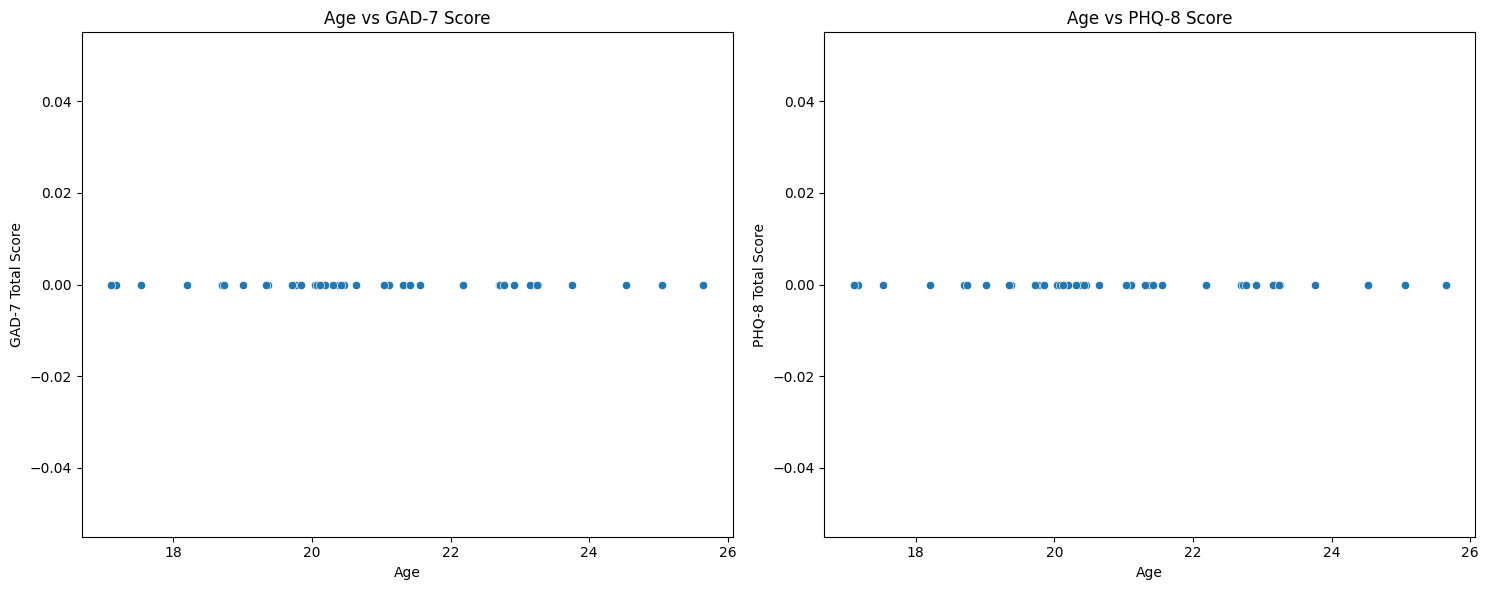

Age Summary Statistics:
count    40.000000
mean     21.000890
std       2.095340
min      17.103354
25%      19.752225
50%      20.551677
75%      22.728953
max      25.642710
Name: age, dtype: float64

GAD-7 Summary Statistics:
count    160.00000
mean       1.51875
std        4.29124
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max       21.00000
Name: gad7_total, dtype: float64

PHQ-8 Summary Statistics:
count    160.000000
mean       1.325000
std        3.667896
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       19.000000
Name: phq8_total, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data
df = pd.read_csv('KidneyTransplantAdol_DATA_2024-10-05_1856.csv')

# Convert birthdate to datetime, specifying the format
df['birthdate'] = pd.to_datetime(df['birthdate'], format='%d-%m-%Y', errors='coerce')

# Calculate age
current_date = datetime.now()
df['age'] = (current_date - df['birthdate']).dt.days / 365.25

# Calculate total GAD-7 and PHQ-8 scores
gad7_cols = [col for col in df.columns if col.startswith('sc_gad') and col.endswith(('cb6637', '2dcfc6', 'c56b72', 'a33a32', 'c490bb', 'c6581d', 'eb6a38'))]
df['gad7_total'] = df[gad7_cols].sum(axis=1)

phq8_cols = [col for col in df.columns if col.startswith('phq8_sc_') and col.endswith(('1', '2', '3', '4', '5', '6', '7', '8'))]
df['phq8_total'] = df[phq8_cols].sum(axis=1)

# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=df.dropna(subset=['age', 'gad7_total']), x='age', y='gad7_total', ax=ax1)
ax1.set_title('Age vs GAD-7 Score')
ax1.set_xlabel('Age')
ax1.set_ylabel('GAD-7 Total Score')

sns.scatterplot(data=df.dropna(subset=['age', 'phq8_total']), x='age', y='phq8_total', ax=ax2)
ax2.set_title('Age vs PHQ-8 Score')
ax2.set_xlabel('Age')
ax2.set_ylabel('PHQ-8 Total Score')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Age Summary Statistics:")
print(df['age'].describe())
print("\nGAD-7 Summary Statistics:")
print(df['gad7_total'].describe())
print("\nPHQ-8 Summary Statistics:")
print(df['phq8_total'].describe())

Age vs GAD-7 Score and Age vs PHQ-8 Score

Data Distribution:

Both plots show data points clustered at 0 on the y-axis across all ages.
The age range appears to be from about 17 to 26 years old.


Lack of Variation:

There's no visible variation in GAD-7 or PHQ-8 scores across ages.
All scores appear to be 0, which is highly unusual and likely indicates a data issue.


Potential Data Issues:

This pattern suggests a problem with data collection, processing, or visualization.
It's implausible that all participants would score 0 on both anxiety (GAD-7) and depression (PHQ-8) measures.


Implications:

As presented, these plots don't provide meaningful insights into the relationship between age and anxiety/depression scores.
Further investigation into data integrity and processing is necessary.


Next Steps:

Verify the raw data and scoring procedures for GAD-7 and PHQ-8.
Check for data transformation errors or visualization code issues.
If the data is correct, consider why all participants might be reporting no symptoms.

### Social Determinants of Health (SDOH) Analysis
This bar plot shows the percentage of "Yes" responses to various Social Determinants of Health questions, highlighting the most prevalent social and environmental challenges faced by the participants.

These visualizations and analyses provide a comprehensive overview of the mental health, quality of life, and social determinants of health for the adolescent kidney transplant patients in the study. The insights gained can help identify areas of concern and guide targeted interventions or support strategies.


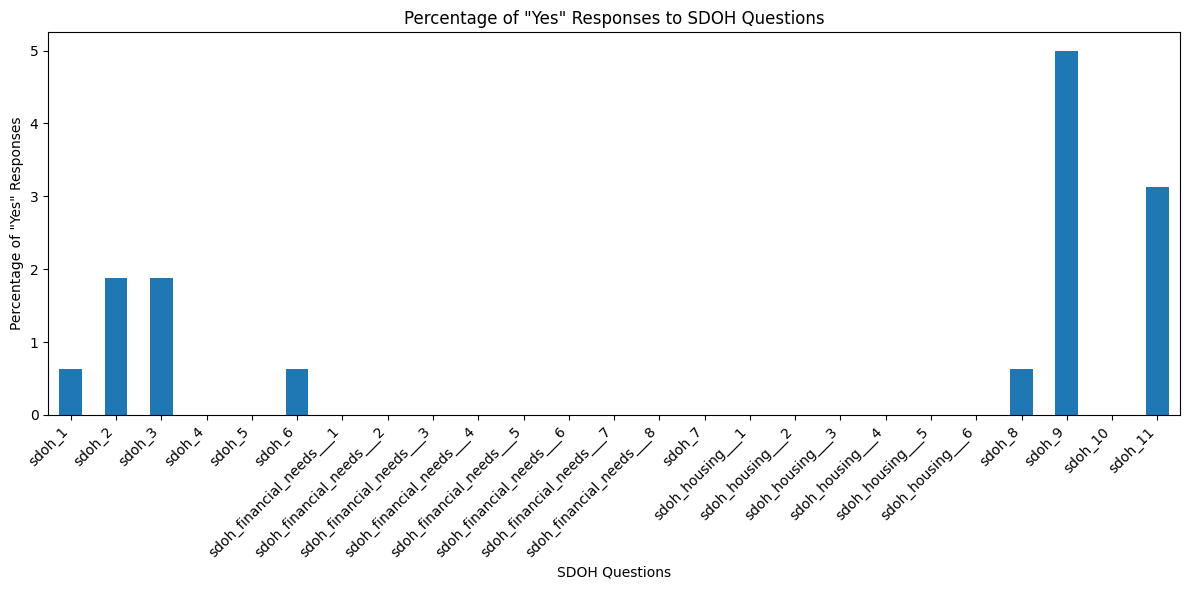

In [ ]:
# Analyze SDOH responses
sdoh_cols = [col for col in df.columns if col.startswith('sdoh_') and col.endswith(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'))]
sdoh_df = df[sdoh_cols]

# Calculate the percentage of 'Yes' responses for each SDOH question
sdoh_percentages = (sdoh_df == 1).mean() * 100

# Create a bar plot of SDOH percentages
plt.figure(figsize=(12, 6))
sdoh_percentages.plot(kind='bar')
plt.title('Percentage of "Yes" Responses to SDOH Questions')
plt.xlabel('SDOH Questions')
plt.ylabel('Percentage of "Yes" Responses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. Questions sdoh_9 and sdoh_10 (e.g., related to education, healthcare access) received the highest percentage of "Yes" responses (about 5% and 3% respectively).
2. Questions sdoh_2 and sdoh_3 also had notable "Yes" responses (both around 2%).
3. Many questions, particularly those related to financial needs and housing, received no "Yes" responses.
4. Overall, the percentage of "Yes" responses is quite low across all questions (5% maximum).
5. This could indicate either a population with few social determinant issues or potential underreporting.


Error in analysis: [Errno 2] No such file or directory: 'your_data_path.csv'

=== TRANSPLANT STUDY ANALYSIS SUMMARY ===

AST Scores Summary:
Number of participants: 42
Mean score: 55.79 (SD: 14.81)
Score range: 29.0 - 87.0
Completion rate: 87.5%

Domain Scores:

Medical Knowledge:
  Mean: 0.22 (SD: 0.30)
  Completion Rate: 100.0%

Medication Management:
  Mean: 0.22 (SD: 0.33)
  Completion Rate: 100.0%

Healthcare Navigation:
  Mean: 0.22 (SD: 0.30)
  Completion Rate: 100.0%

Self-Advocacy:
  Mean: 0.22 (SD: 0.25)
  Completion Rate: 100.0%


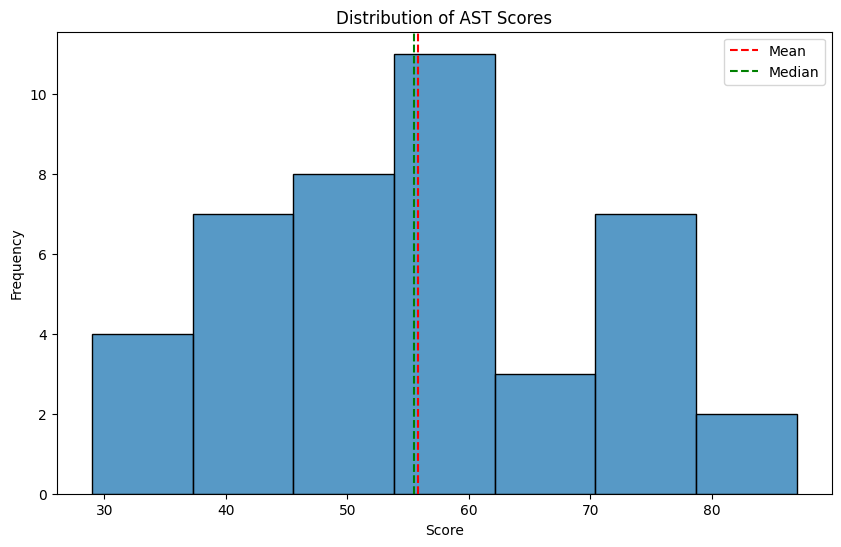

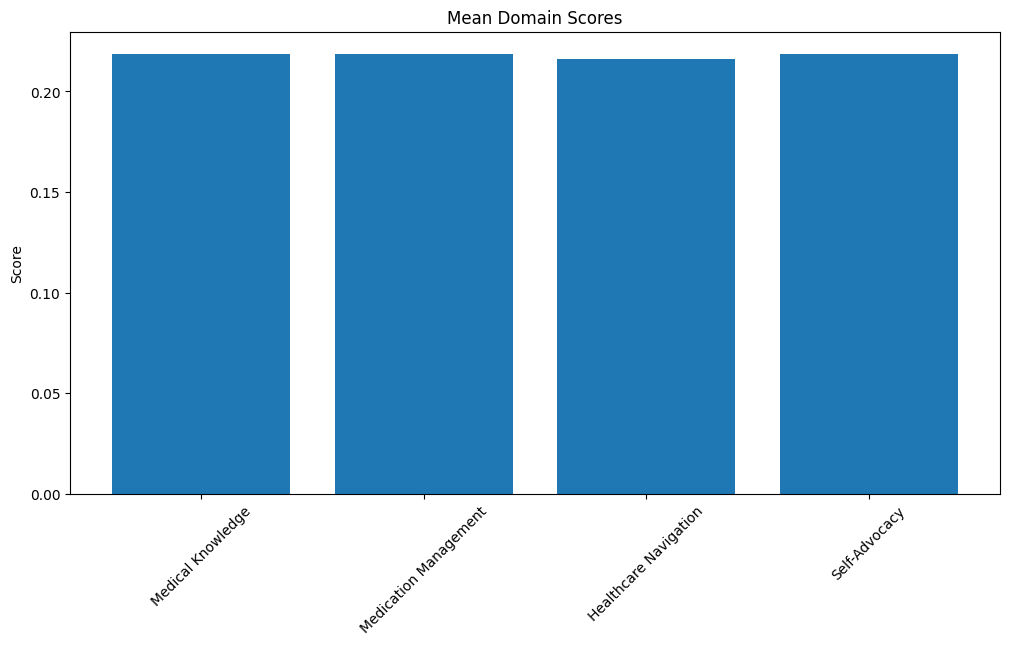

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import Dict, List, Tuple, Optional

class TransplantStudyAnalyzer:
    def __init__(self, df: pd.DataFrame):
        self.raw_df = df
        # Define visit identifiers based on completion flags
        self.visit_identifiers = {
            1: 'ast_transition_readiness_assessment_tool_late_tran_complete',
            2: 'brief_2_behavior_rating_inventory_of_executive_fun_complete',
            3: ['gad7_anxiety_complete', 'phq9_modified_for_teens_complete'],
            4: ['social_needs_patient_questionnaire_complete', 'pittsburgh_sleep_quality_index_psqi_complete'],
            5: 'pedsql_young_adult_quality_of_life_inventory_v40_y_complete',
            6: 'brief_2_behavior_rating_inventory_of_executiv_4875_complete',
            7: ['v2_gad_7_anxiety_complete', 'v2_phq9_modified_for_teens_complete'],
            8: 'transition_readiness_checklist_late_transition_17_complete',
            9: 'ast_transition_readiness_assessment_tool_late_tran_complete'
        }
        self.clean_df = self._preprocess_data()

    def _preprocess_data(self) -> pd.DataFrame:
        """Clean and prepare data for analysis"""
        df = self.raw_df.copy()

        # Convert date columns
        date_cols = [col for col in df.columns if 'date' in col.lower() or 'timestamp' in col.lower()]
        for col in date_cols:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce')

        # Convert numeric columns
        numeric_cols = ['ast_total_score'] + [col for col in df.columns
                                            if any(x in col for x in ['gad', 'phq', 'pedsql'])]
        for col in numeric_cols:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')

        return df

    def _get_visit_data(self, visit: int, column: str) -> pd.Series:
        """Get data for a specific visit using completion flags"""
        identifier = self.visit_identifiers[visit]
        if isinstance(identifier, list):
            mask = self.clean_df[identifier[0]] == 2  # Completed status
        else:
            mask = self.clean_df[identifier] == 2  # Completed status

        return self.clean_df.loc[mask, column].dropna()

    def analyze_ast_scores(self) -> Dict:
        """Analyze AST scores"""
        ast_data = self.clean_df['ast_total_score'].dropna()

        results = {
            'summary': {
                'n': len(ast_data),
                'mean': ast_data.mean(),
                'std': ast_data.std(),
                'median': ast_data.median(),
                'range': (ast_data.min(), ast_data.max())
            },
            'completion_rate': (len(ast_data) / len(self.clean_df)) * 100
        }

        return results

    def analyze_domain_scores(self) -> Dict:
        """Analyze scores across domains"""
        domains = {
            'Medical Knowledge': ['mt1_v2_v2', 'mt2_v2_v2', 'mt3_v2_v2', 'mt4_v2_v2', 'mt5_v2_v2'],
            'Medication Management': ['mm6_v2_v2', 'mm7_v2_v2', 'mm8_v2_v2', 'mm9_v2_v2'],
            'Healthcare Navigation': ['ad10_v2_v2', 'ad11_v2_v2', 'ad12_v2_v2', 'ad13_v2_v2'],
            'Self-Advocacy': ['rb16_v2_v2', 'rb17_v2_v2']
        }

        results = {}
        for domain, columns in domains.items():
            domain_data = pd.DataFrame()
            for col_prefix in columns:
                # Get all columns that start with the prefix
                cols = [col for col in self.clean_df.columns if col.startswith(col_prefix)]
                if cols:
                    data = self.clean_df[cols].apply(pd.to_numeric, errors='coerce')
                    domain_data = pd.concat([domain_data, data], axis=1)

            if not domain_data.empty:
                results[domain] = {
                    'mean': domain_data.mean().mean(),
                    'std': domain_data.std().mean(),
                    'completion_rate': (domain_data.notna().sum().sum() /
                                      (domain_data.shape[0] * domain_data.shape[1]) * 100)
                }

        return results

    def create_visualizations(self) -> Dict:
        """Create visualization suite"""
        figs = {}

        # 1. AST Score Distribution
        fig, ax = plt.subplots(figsize=(10, 6))
        ast_data = self.clean_df['ast_total_score'].dropna()
        if len(ast_data) > 0:
            sns.histplot(ast_data, ax=ax)
            ax.axvline(ast_data.mean(), color='r', linestyle='--', label='Mean')
            ax.axvline(ast_data.median(), color='g', linestyle='--', label='Median')
            ax.set_title('Distribution of AST Scores')
            ax.set_xlabel('Score')
            ax.set_ylabel('Frequency')
            ax.legend()
        figs['ast_distribution'] = fig

        # 2. Domain Scores
        domain_scores = self.analyze_domain_scores()
        if domain_scores:
            fig, ax = plt.subplots(figsize=(12, 6))
            domains = list(domain_scores.keys())
            means = [scores['mean'] for scores in domain_scores.values()]

            ax.bar(range(len(domains)), means)
            ax.set_xticks(range(len(domains)))
            ax.set_xticklabels(domains, rotation=45)
            ax.set_title('Mean Domain Scores')
            ax.set_ylabel('Score')
            figs['domain_scores'] = fig

        return figs

    def generate_report(self) -> Dict:
        """Generate comprehensive analysis report"""
        report = {
            'ast_analysis': self.analyze_ast_scores(),
            'domain_analysis': self.analyze_domain_scores(),
        }

        return report

    def print_summary(self) -> None:
        """Print analysis summary"""
        report = self.generate_report()

        print("\n=== TRANSPLANT STUDY ANALYSIS SUMMARY ===\n")

        # AST Scores
        ast = report['ast_analysis']
        print("AST Scores Summary:")
        print(f"Number of participants: {ast['summary']['n']}")
        print(f"Mean score: {ast['summary']['mean']:.2f} (SD: {ast['summary']['std']:.2f})")
        print(f"Score range: {ast['summary']['range'][0]:.1f} - {ast['summary']['range'][1]:.1f}")
        print(f"Completion rate: {ast['completion_rate']:.1f}%")

        # Domain Scores
        print("\nDomain Scores:")
        for domain, scores in report['domain_analysis'].items():
            print(f"\n{domain}:")
            print(f"  Mean: {scores['mean']:.2f} (SD: {scores['std']:.2f})")
            print(f"  Completion Rate: {scores['completion_rate']:.1f}%")

def main():
    """Main function to run the analysis"""
    try:
        # Load data
        df = pd.read_csv('your_data_path.csv')

        # Create analyzer
        analyzer = TransplantStudyAnalyzer(df)

        # Generate report
        report = analyzer.generate_report()

        # Create visualizations
        visualizations = analyzer.create_visualizations()

        # Print summary
        analyzer.print_summary()

        # Show visualizations
        plt.show()

    except Exception as e:
        print(f"Error in analysis: {str(e)}")

if __name__ == "__main__":
    main()

# Load data
df = pd.read_csv('/content/ExtendedMultidiscipl_DATA_2024-10-22_1316_14-01-2025.csv')

# Create analyzer
analyzer = TransplantStudyAnalyzer(df)

# Generate and print report
report = analyzer.generate_report()
analyzer.print_summary()

# Show visualizations
viz = analyzer.create_visualizations()
plt.show()
